In [29]:
import pandas as pd  # Importa la biblioteca Pandas para el análisis y manipulación de datos tabulares

import seaborn as sns  # Importa la biblioteca Seaborn para la visualización estadística de datos

import plotly.express as px  # Importa la biblioteca Plotly Express para crear gráficos interactivos y expresivos

import matplotlib.pyplot as plt  # Importa la biblioteca Matplotlib para la visualización básica de datos

# Configuración específica para Jupyter Notebook para mostrar gráficos generados por Matplotlib en línea
%matplotlib inline  

# Importa funciones y clases necesarias para trabajar con Plotly fuera de línea
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot  

import json  # Importa el módulo json para trabajar con datos en formato JSON

import ast  # Importa el módulo ast para analizar y evaluar expresiones de Python literalmente

import numpy as np  # Importa la biblioteca NumPy para operaciones numéricas eficientes y manejo de matrices

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# libreria para dividir los datos
from sklearn.model_selection import train_test_split
# ibreria que contiene el Algoritmo DT Clasificador
from sklearn.tree import DecisionTreeClassifier
# libraría para medir desempeño de algoritmos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree # librería para trazar el arbol de decisión
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [8]:
# Lectura del archivo "DonSantiagoVinos-400.csv"
vinos_data= pd.read_csv("DonSantiagoVinos-400.csv")

# Lectura del archivo "dStgo400.csv"
evaluaciones_vinos = pd.read_csv("dStgo400.csv")

In [6]:
vinos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color_cepa            9396 non-null   object 
 1   acidez_fija           9396 non-null   float64
 2   acidez_volatil        9396 non-null   float64
 3   acido_citrico         9396 non-null   float64
 4   azucar_residual       9396 non-null   float64
 5   cloruros              9396 non-null   float64
 6   dioxido_azufre_libre  9396 non-null   float64
 7   dioxido_azufre_total  9396 non-null   float64
 8   densidad              9396 non-null   float64
 9   pH                    9396 non-null   float64
 10  sulfatos              9396 non-null   float64
 11  alcohol               9396 non-null   float64
 12  calificacion          9396 non-null   int64  
 13  precio                9396 non-null   int64  
 14  nota_de_cata          9396 non-null   object 
dtypes: float64(11), int64

In [10]:
evaluaciones_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color_cepa            400 non-null    object 
 1   acidez_fija           400 non-null    float64
 2   acidez_volatil        400 non-null    float64
 3   acido_citrico         400 non-null    float64
 4   azucar_residual       400 non-null    float64
 5   cloruros              400 non-null    float64
 6   dioxido_azufre_libre  400 non-null    float64
 7   dioxido_azufre_total  400 non-null    float64
 8   densidad              400 non-null    float64
 9   pH                    400 non-null    float64
 10  sulfatos              400 non-null    float64
 11  alcohol               400 non-null    float64
 12  calificacion          400 non-null    int64  
 13  precio                0 non-null      float64
 14  nota_de_cata          0 non-null      float64
dtypes: float64(13), int64(1

In [47]:
data = vinos_data

In [48]:
print("Numero de observaciones (registros) : %4d"%(data.shape[0]))
print("Numero de variables (columnas) : %4d"%(data.shape[1]))

Numero de observaciones (registros) : 9396
Numero de variables (columnas) :   15


In [49]:
feature_cols = ["acidez_fija","acidez_volatil","azucar_residual","dioxido_azufre_libre","dioxido_azufre_total","alcohol"]


In [50]:
# Separamos cada característica en una variable diferente
y0 = data["acidez_fija"]
y1 = data["acidez_volatil"]
y2 = data["azucar_residual"]
y3 = data["dioxido_azufre_libre"]
y4 = data["dioxido_azufre_total"]
y5 = data["alcohol"]

In [51]:
# Agrupamos todas las variables en una lista
y_data = [y0, y1, y2, y3]

In [52]:

# Definimos los colores que usaremos para cada característica en la visualización
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)','rgba(255, 65, 54, 0.5)']

# Creamos un objeto Figura vacío
fig = go.Figure()

# Para cada característica, datos y color en nuestras listas, creamos un trazo de gráfico de caja
for xd, yd, cls in zip(feature_cols, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',  # Mostrar todos los puntos de datos
            jitter=0.5,  # Agregar una pequeña variación aleatoria a la posición de los puntos de datos
            whiskerwidth=0.2,  # Establecer el ancho de los bigotes del diagrama de caja
            fillcolor=cls,  # Establecer el color de relleno del diagrama de caja
            marker_size=2,  # Tamaño de los puntos de datos
            line_width=1)   # Ancho de la línea del diagrama de caja
        )

# Actualizamos el diseño de la figura
fig.update_layout(
    title='Dimensiones de las caracteristicas ',
    yaxis=dict(
        autorange=True,  # Permitir que la escala del eje y se ajuste automáticamente
        showgrid=True,  # Mostrar la cuadrícula
        zeroline=True,  # Mostrar la línea del cero
        dtick=1,  # Intervalo entre las marcas del eje y
        gridcolor='rgb(255, 255, 255)',  # Color de la cuadrícula
        gridwidth=1,  # Ancho de la cuadrícula
        zerolinecolor='rgb(255, 255, 255)',  # Color de la línea del cero
        zerolinewidth=2,  # Ancho de la línea del cero
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',  # Color de fondo de la figura
    plot_bgcolor='rgb(243, 243, 243)',  # Color de fondo del trazado
    showlegend=False  # No mostrar leyenda
)


Empty DataFrame
Columns: [color_cepa, acidez_fija, acidez_volatil, acido_citrico, azucar_residual, cloruros, dioxido_azufre_libre, dioxido_azufre_total, densidad, pH, sulfatos, alcohol, calificacion, precio, nota_de_cata]
Index: []


Empty DataFrame
Columns: [color_cepa, acidez_fija, acidez_volatil, acido_citrico, azucar_residual, cloruros, dioxido_azufre_libre, dioxido_azufre_total, densidad, pH, sulfatos, alcohol, calificacion, precio, nota_de_cata]
Index: []


<Axes: >

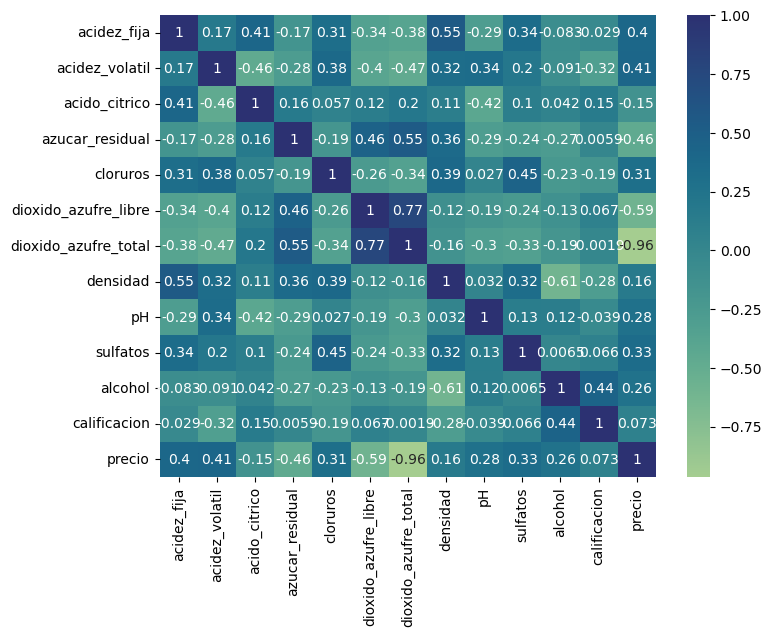

In [53]:
# Despliega  una matriz de correlación entre variables
fig, ax = plt.subplots(figsize=(8, 6))
cormat=data.corr()
sns.heatmap(cormat, annot=True, ax = ax, cmap='crest')

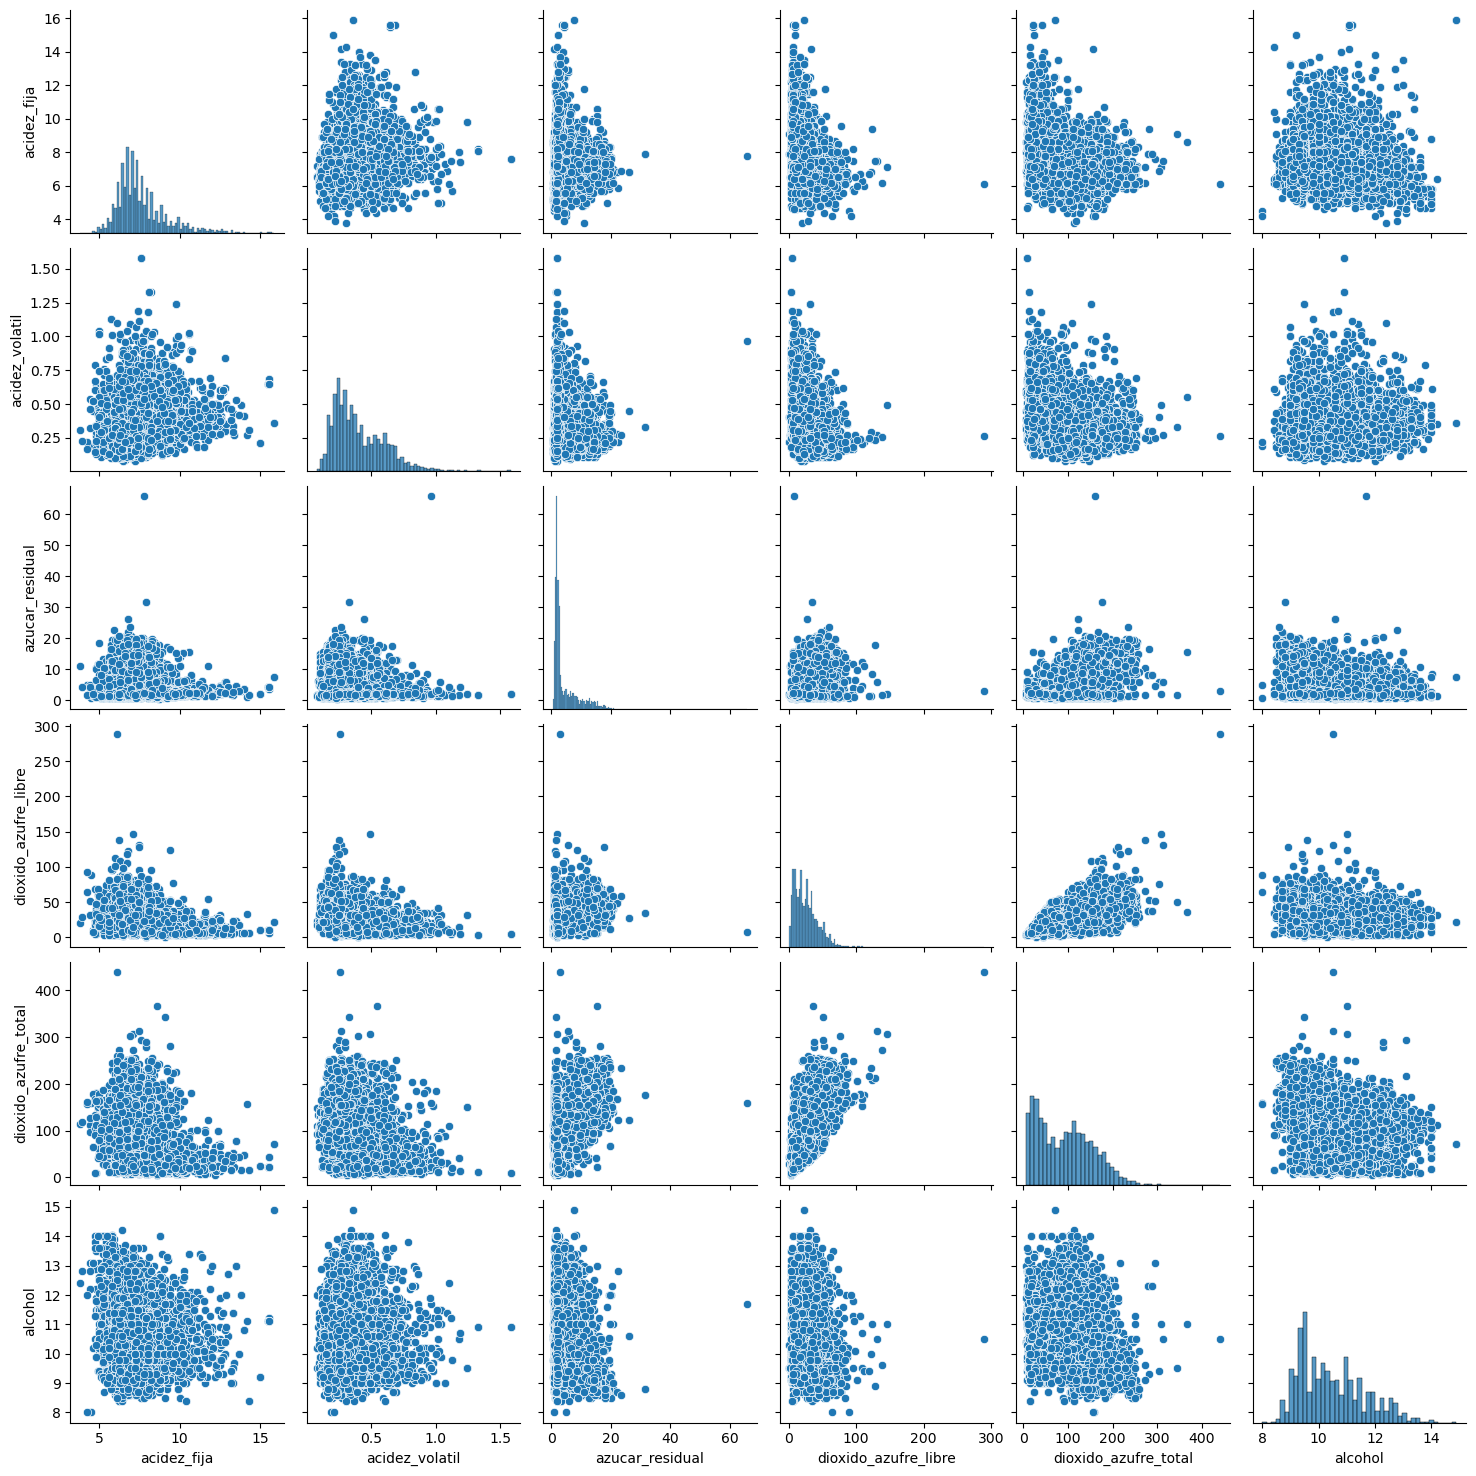

In [42]:
# Realiza una correlación de las variables
sns.pairplot(data)

In [54]:
D = data[feature_cols]

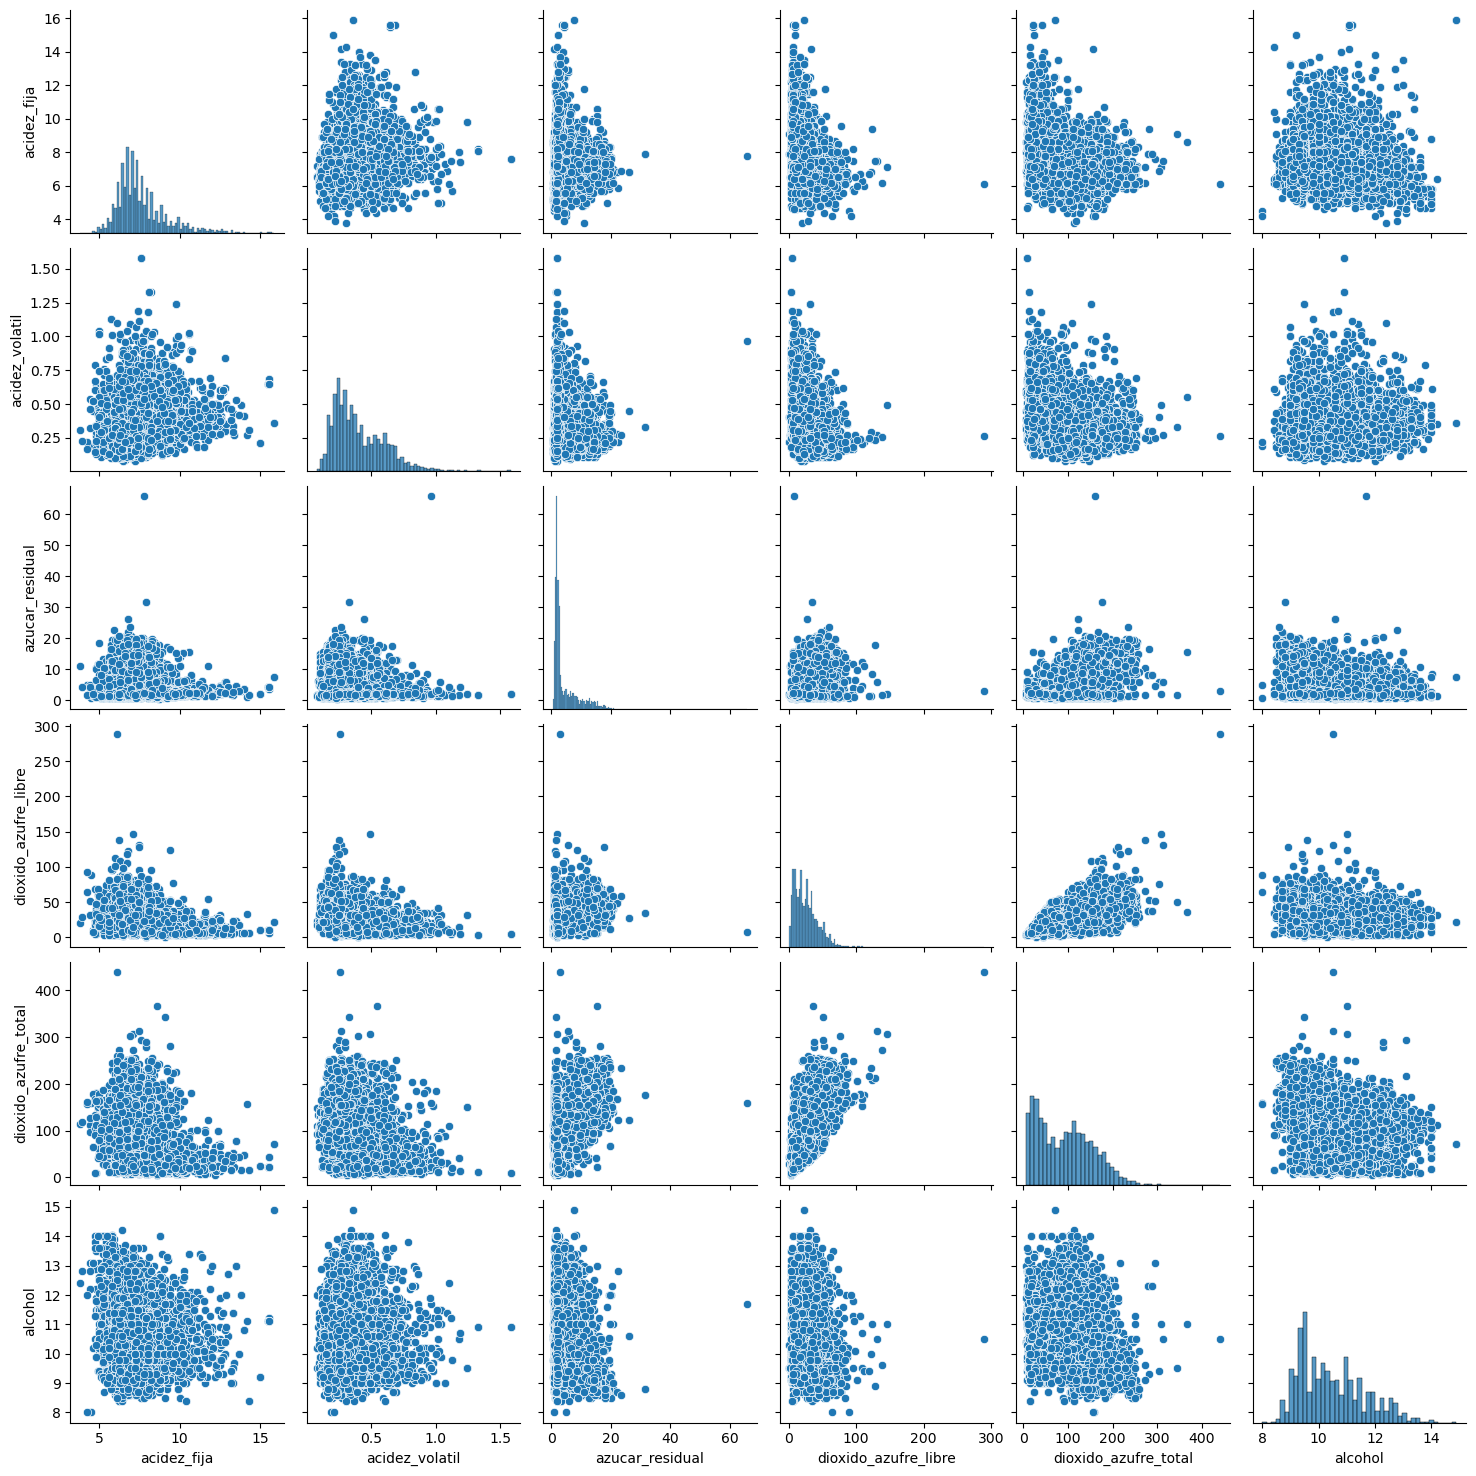

In [55]:
sns.pairplot(D)

<Axes: >

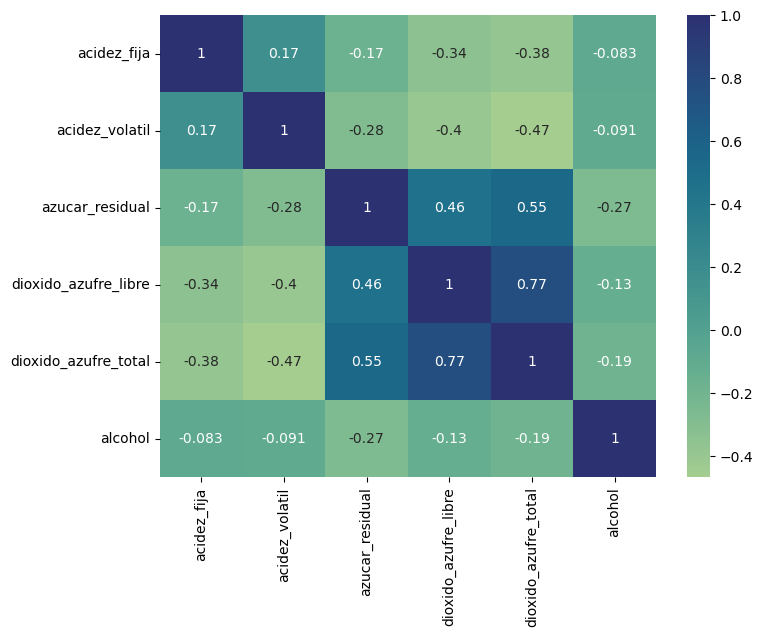

In [56]:
# Despliega  una matriz de correlación entre variables
fig, ax = plt.subplots(figsize=(8, 6))
cormat=D.corr()
sns.heatmap(cormat, annot=True, ax = ax, cmap='crest')

In [57]:
# Extración de los Atributos / Features
X = D

# Extracción de las Clases o Labels o etiquetas
y = data["color_cepa"]

In [58]:
# Creamos los sub-conjuntos de datos de Train (Entrenamiento) & Pruebas Test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 23, test_size = 0.25)

In [59]:
cepa_names=y.unique().tolist()
cepa_names

['blanco', 'tinto']

In [60]:
# muestra no de registros por cada conjunto de datos de entrenamiento
print(X_train.shape, y_train.shape)

(7047, 6) (7047,)


In [61]:
print(X_test.shape, y_test.shape)

(2349, 6) (2349,)


In [62]:
# revisamos los datos de prueba para verificar que la selecció es aleatoria
X_test

,acidez_fija,acidez_volatil,azucar_residual,dioxido_azufre_libre,dioxido_azufre_total,alcohol
605,5.9,0.55,2.2,39.0,51.0,11.200000
7839,6.4,0.21,5.9,29.0,101.0,11.000000
2844,6.7,0.24,13.1,64.0,205.0,9.500000
8137,7.2,0.24,1.2,11.0,95.0,12.500000
5382,7.3,0.25,1.5,19.0,113.0,10.100000
...,...,...,...,...,...,...
8872,7.0,0.53,1.0,39.0,107.0,9.000000
1780,7.5,0.77,8.1,30.0,92.0,9.200000
9035,5.2,0.22,6.2,41.0,187.0,9.733333
2349,7.0,0.17,12.8,24.0,126.0,12.200000


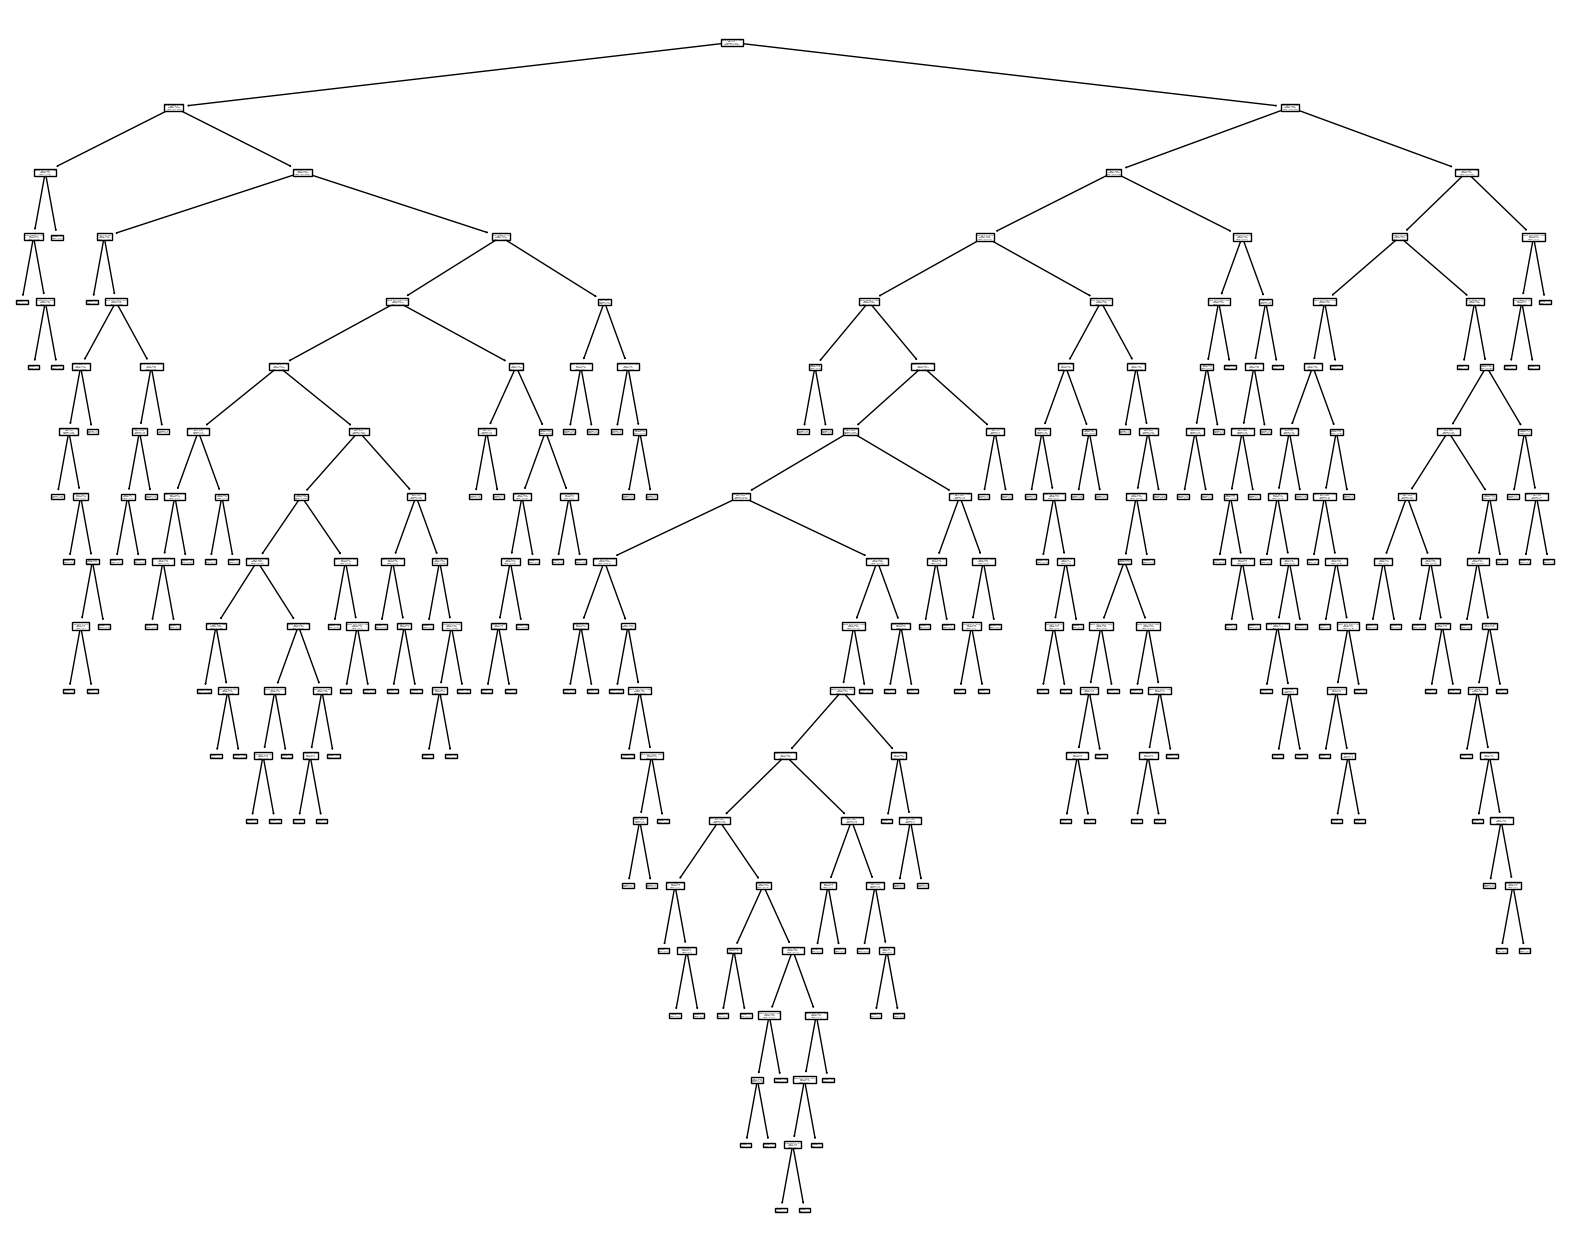

In [63]:
# Creamos un CLasificador del tipo Decision Tree
dt = DecisionTreeClassifier()
# Entrenamos el Arbol con los Datos de Entrenamiento TRAIN
dt.fit(X_train,y_train)
# Grafica el Arbol de Decisión del modelo preparado
plt.figure(figsize=(20,16))
tree.plot_tree(dt,feature_names=feature_cols)
plt.show()

In [64]:
# Revisamos la precisión del modelo
y_pred = dt.predict(X_test)

print("Accuracy en Datos de Entrenamiento: %4.2f" % (100*accuracy_score(y_true = y_train, y_pred=dt.predict(X_train))))
print("Accuracy en Datos de Pruebas: %4.2f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)))

Accuracy en Datos de Entrenamiento: 99.99
Accuracy en Datos de Pruebas: 98.64


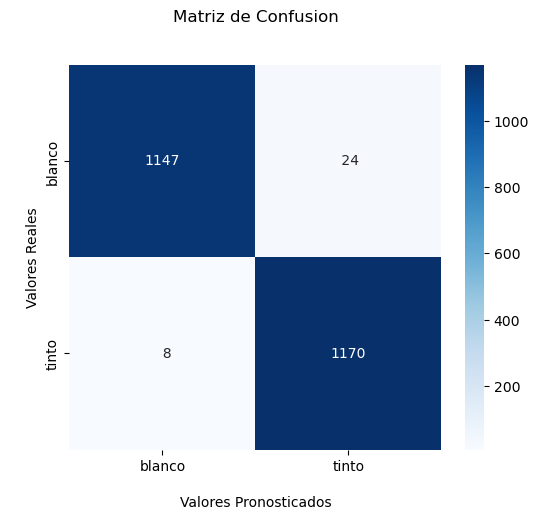

              precision    recall  f1-score   support

      blanco       0.99      0.98      0.99      1171
       tinto       0.98      0.99      0.99      1178

    accuracy                           0.99      2349
   macro avg       0.99      0.99      0.99      2349
weighted avg       0.99      0.99      0.99      2349



In [66]:
fig, ax = plt.subplots(figsize=(6, 5))

# calcula la matriz de confusión
mat=confusion_matrix(y_test, y_pred)
# genera el heatmap con la mat-confu
ax = sns.heatmap(mat, annot=True, fmt="3d", cmap='Blues')

# Pone titulos en Grafico y Ejes
ax.set_title('Matriz de Confusion\n\n');
ax.set_xlabel('\nValores Pronosticados')
ax.set_ylabel('\nValores Reales');

# Pone nombre de clases en los ejes para mejor legibilidad
ax.xaxis.set_ticklabels(cepa_names)
ax.yaxis.set_ticklabels(cepa_names)

## Despliega la Matriz de Confusion.
plt.show()

# Despliega el reporte de clasificación
report=classification_report(y_test,y_pred)
print(report)